In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy import stats
import statistics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns

import os
from scipy.stats import skew, probplot, norm
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, Lasso, ElasticNet 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train=train.append(test)

In [61]:
print(train.shape)
print(test.shape)

(2919, 81)
(1459, 80)


In [62]:
print(train.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [63]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [64]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize']= [8.0, 4.0]

In [65]:
# categorical features
categorical_feat1 = train.columns[train.dtypes=='object'].tolist()

# numerical features
numeric_feat1 = train.columns[(train.dtypes=='int64')|(train.dtypes=='float64')].drop('SalePrice').tolist()

print('categorical features:\n{}\n{}'.format(sorted(categorical_feat1), len(categorical_feat1)))
print('\nnumerical features:\n{}\n{}'.format(sorted(numeric_feat1), len(numeric_feat1)))

categorical features:
['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
43

numerical features:
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'Overall

In [66]:
def check_missingness(df):
    missing_features = df.columns[df.isna().any()]

    # how bad is the missing ?
    missing = {}
    for i in missing_features:
        missing[i]= df[i].isna().sum()
    missing = pd.Series(missing).sort_values(ascending=False)
    return missing

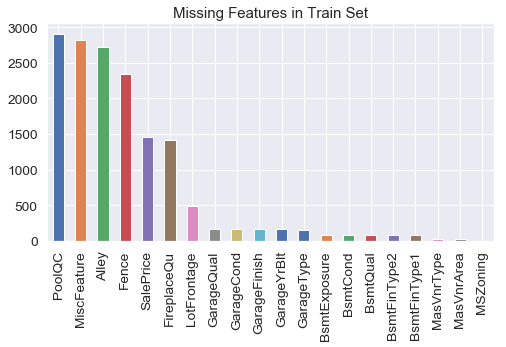

In [67]:
check_missingness(train)[:20].plot(kind='bar')
plt.title('Missing Features in Train Set')
plt.savefig('train_missing.png',bbox_inches='tight')

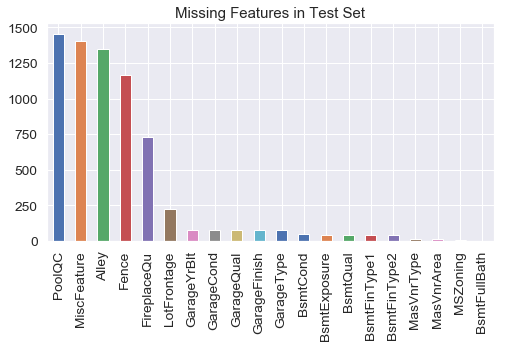

In [68]:
check_missingness(test)[:20].plot(kind='bar')
plt.title('Missing Features in Test Set')

plt.savefig('test_missing.png',bbox_inches='tight')

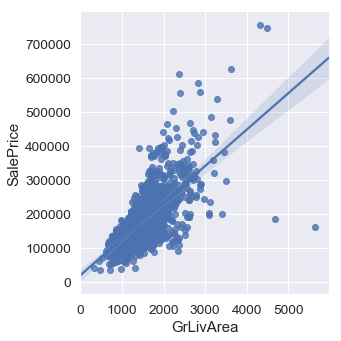

In [69]:
sns.lmplot(x='GrLivArea', y= 'SalePrice', data=train)
plt.savefig('saleprice_grlivarea.png',bbox_inches='tight')

(-0.5, 9.5, 0, 800000)

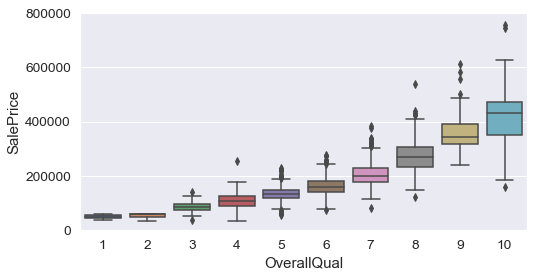

In [70]:
sns.boxplot(train.OverallQual, train.SalePrice)
plt.axis(ymin=0, ymax=800000)

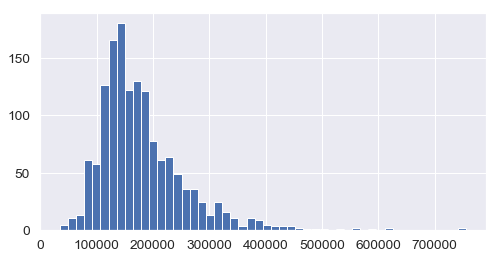

In [71]:
train.SalePrice.hist(bins=50)
plt.savefig('saleprice.png',bbox_inches='tight')

In [83]:
# Correlation

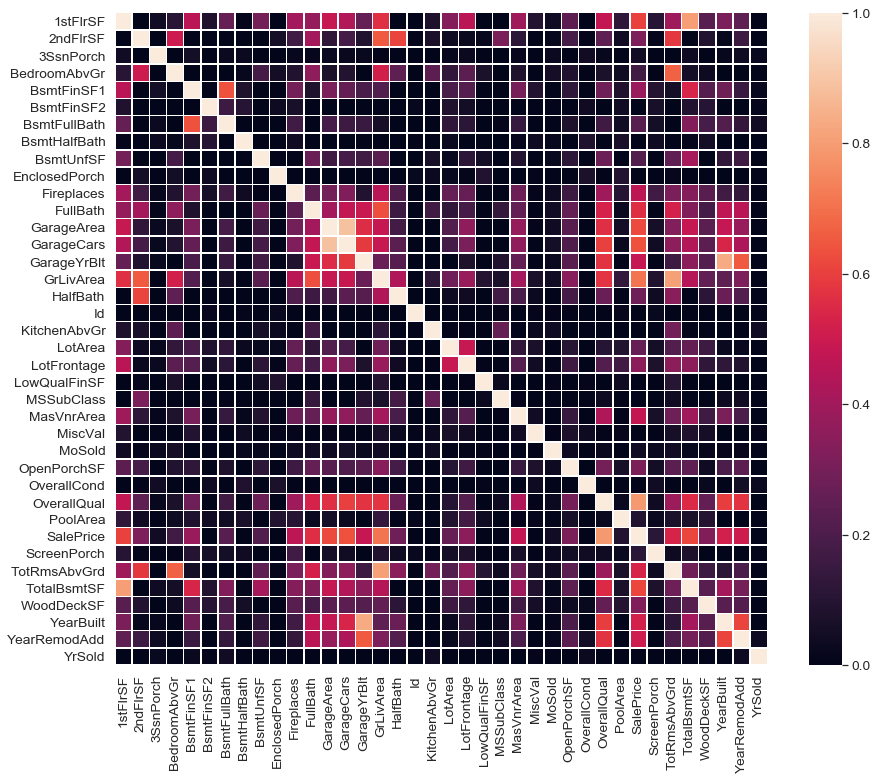

In [73]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,linewidths=.5,vmin=0, vmax=1, square=True)

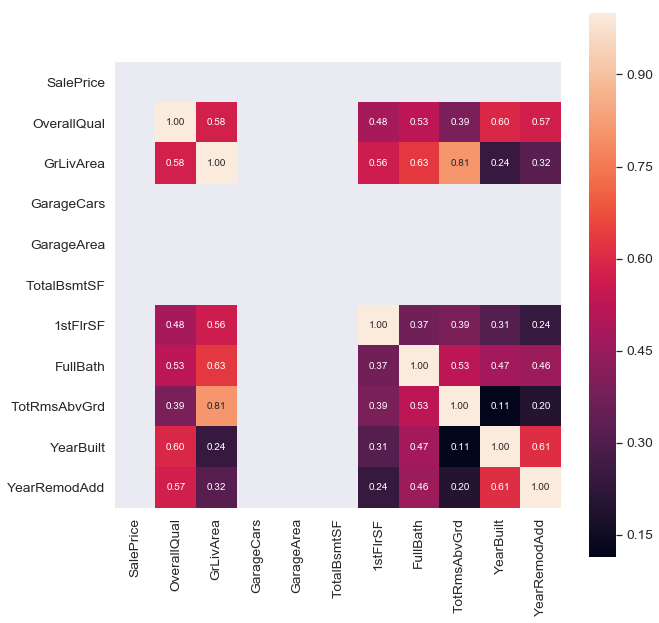

In [74]:
plt.figure(figsize=(10,10))
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [75]:
# sns.set()
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(train[cols], height = 2.5)
# plt.show()

In [76]:
# Data Processing

In [77]:
def process_missing(df):
   
    # fill LotFrontage missings with median value in the same neighborhood
    df['LotFrontage'] = df[['Neighborhood','LotFrontage']].groupby('Neighborhood').transform(lambda x: x.fillna(x.median()))

    # impute MSZoning missings as the most frequent value in the same MSSubClass
    df['MSZoning'] = df[['MSSubClass', 'MSZoning']].groupby('MSSubClass').transform(lambda x: x.fillna(x.mode()[0]))

    df['Utilities'] =df['Utilities'].fillna(df['Utilities'].mode()[0])

    df['Exterior1st'] = df['Exterior1st'].fillna('Wd Sdng')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Wd Sdng')

    df['Electrical']=df.groupby('Neighborhood')['Electrical'].transform(lambda x: x.fillna(x.mode()[0]))

    df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
    df['KitchenQual'] = df.groupby('Neighborhood')['KitchenQual'].transform(lambda x: x.mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    df[numeric_feat1] = df[numeric_feat1].fillna(0)
    df[categorical_feat1] = df[categorical_feat1].fillna('None')

    #print(df.head())
    return df

In [78]:
all_data = pd.concat([train.copy().drop(columns=['SalePrice']), test.copy()], axis=0)

In [79]:
all_data = process_missing(all_data)

In [80]:
all_data.isnull().any().sum()

0

In [81]:
# Feature Engineering

In [82]:
def Feat_engineering1(data):
    df = data.copy()
    # drop 'Id', 'Street', 'Utilities','PoolQC'
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC', 'PoolArea', 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath',\
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF','TotalBsmtSF', '1stFlrSF',\
                  '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd'])
    # convert PoolArea to binary
    df['HasPool'] = df['PoolArea'].apply(lambda x: 'Yes' if x>0 else 'No')

    # convert to categorical
    df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']] = df[['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']].astype(str)

    # combine features of 'HalfBath', 'BsmtHalfBath', 'FullBath', 'BsmtFullBath'
    df['TotalBath'] = df['HalfBath']/2 + df['BsmtHalfBath']/2 + df['FullBath'] + df['BsmtFullBath']
    df['TotalBath'] = df['TotalBath'].astype('str')

    # combine features of 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'WoodDeckSF'
    df['Total_PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

    # combine features of TotalSF = TotalBsmtSF + X1stFlrSF + X2ndFlrSF
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine features of 'BsmtFinSF1', 'BsmtFinSF2', 'X1stFlrSF', 'X2ndFlrSF'
    df['TotalFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']

    # combine 'YearBuilt', 'YearRemodAdd'
    df['YearBuildRemod'] = df['YearBuilt'] + df['YearRemodAdd']

    # add new features
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['Has2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    df['HasBasement'] = df['TotalBsmtSF'].apply(lambda x: 'Yes' if x>0 else 'No')

    new_columns = list(set(df.columns).difference(to_remove))
    

    return df[new_columns]

In [83]:
def Feat_engineering(data):
    df = data.copy()
    
     # convert to categorical
    to_categorical = ['KitchenAbvGr', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                      'GarageCars', 'HalfBath','BsmtHalfBath',
                      'FullBath','BsmtFullBath','Fireplaces']
    
    df[to_categorical] = df[to_categorical].astype(str)

    # drop features
    to_remove=set(['Id', 'Street', 'Utilities','PoolQC'])
    new_columns = list(set(df.columns).difference(to_remove))
    
    return df[new_columns]

In [84]:
all_data = Feat_engineering(all_data)

In [85]:
categorical_feat = all_data.columns[all_data.dtypes=='object']
numeric_feat = all_data.columns[all_data.dtypes!='object']

In [86]:
print(len(categorical_feat))
print(len(numeric_feat))

49
27


In [87]:
# skew transform

In [88]:
def skew_transform(data):
    df = data.copy()
    skew_features = df.apply(lambda x: skew(x)).sort_values(ascending=False)

    high_skew = skew_features[skew_features > 0.75]
    skew_index = high_skew.index
    print(skew_index)

    df[skew_index] = df[skew_index].apply(lambda x: boxcox1p(x, boxcox_normmax(x+1)))
    return df

In [89]:
all_data[numeric_feat] = skew_transform(all_data[numeric_feat])

Index(['MiscVal', 'PoolArea', 'LowQualFinSF', 'LotArea', '3SsnPorch',
       'EnclosedPorch', 'BsmtFinSF2', 'ScreenPorch', 'MasVnrArea',
       'OpenPorchSF', 'WoodDeckSF', '1stFlrSF', 'MSSubClass', 'BsmtFinSF1',
       'LotFrontage', 'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF'],
      dtype='object')


In [90]:
# Normalize Sale Price
salePrice = np.log(train.SalePrice)

In [91]:
plt.rcParams['figure.figsize']= [10.0, 4.0]

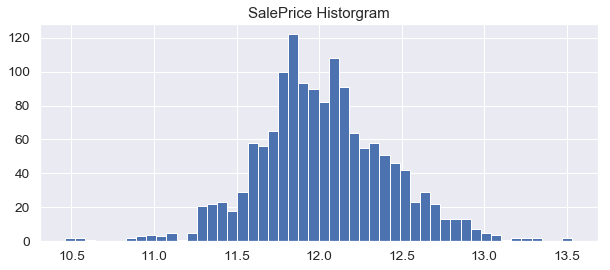

In [92]:
salePrice.hist(bins=50)
plt.title('SalePrice Historgram')
plt.savefig('saleprice_log.png',bbox_inches='tight')

In [93]:
numeric_feat

Index(['LotFrontage', 'PoolArea', 'TotalBsmtSF', 'OverallCond', 'YearBuilt',
       'MiscVal', 'LowQualFinSF', 'OverallQual', 'ScreenPorch', 'BsmtUnfSF',
       '3SsnPorch', '1stFlrSF', 'BsmtFinSF1', 'LotArea', 'MoSold', '2ndFlrSF',
       'EnclosedPorch', 'YearRemodAdd', 'MasVnrArea', 'MSSubClass', 'YrSold',
       'GrLivArea', 'GarageYrBlt', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea',
       'BsmtFinSF2'],
      dtype='object')

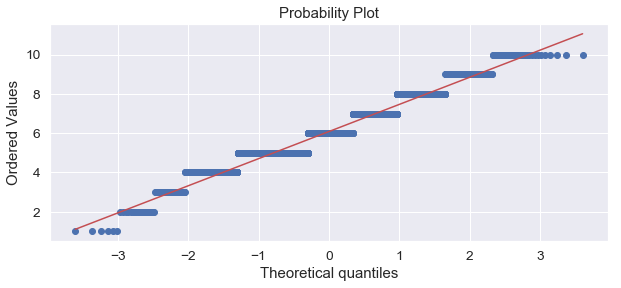

In [94]:
probplot(all_data['OverallQual'], plot=plt)
plt.savefig('overallqual transformed.png',bbox_inches='tight')

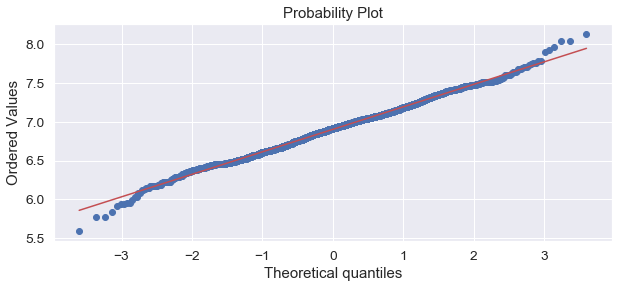

In [95]:
probplot(all_data['GrLivArea'], plot=plt)
plt.savefig('GrLivArea transform.png',bbox_inches='tight')

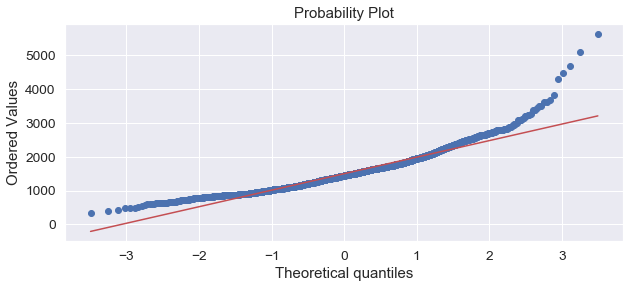

In [96]:
probplot(train['GrLivArea'], plot=plt)
plt.savefig('GrLivArea before.png',bbox_inches='tight')

In [97]:
# remove outliers

In [98]:
from scipy.stats import zscore
z_score = {}
for i in numeric_feat:
    z_score[i] = zscore(all_data[i])
z_score = pd.DataFrame(z_score)
z_score = z_score.head(train.shape[0])
for i in ['OverallQual','GrLivArea']:
    print(i,z_score[np.abs(z_score[i])>3.5][i].sort_values(ascending=False))

OverallQual 2904   -3.584885
2216   -3.584885
533    -3.584885
375    -3.584885
Name: OverallQual, dtype: float64
GrLivArea 1298    4.247001
2549    3.935942
523     3.673844
1182    3.540218
1100   -3.678469
2098   -3.909939
533    -4.534217
Name: GrLivArea, dtype: float64


In [99]:
# choose the highest z_score from two ends as outlier
# two outliers case
outliers = [1298, 533] 

# four outliers case
outliers = [1298, 533, 523, 1100]

In [100]:
to_drop = list(map(lambda x: x[0]+'_'+x[1],[(i, all_data[i].mode()[0]) for i in categorical_feat]))

In [101]:
cat_dummy = pd.get_dummies(all_data[categorical_feat]).drop(columns=to_drop)

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_label = all_data.copy()
for i in categorical_feat:
    data_label[i] = le.fit_transform(data_label[i])

In [103]:
data_dummy = pd.concat([cat_dummy,all_data[numeric_feat]], axis=1)

In [104]:
X = data_dummy.head(train.shape[0])
X.drop(outliers, inplace=True)
y = salePrice.copy()
y.drop(outliers, inplace=True)

In [105]:
X_le=data_label.head(train.shape[0])
X_le.drop(outliers, inplace=True)

In [106]:
X.shape

(2911, 287)

In [107]:
X_le.shape

(2911, 76)

In [108]:
def get_error(X_train,y_train,X_test,y_test, model, show = True, refit = True):
    if refit: model.fit(X_train, y_train)
    train_error = 1 - r2_score(y_train, model.predict(X_train))
    test_error = 1 - r2_score(y_test,model.predict(X_test))
    if show:
        print("train error ", train_error)
        print("test error", test_error)
    return [train_error, test_error]

In [109]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=108)
train_idx = X_train.index
test_idx = X_test.index

In [110]:
plt.rcParams['figure.figsize']= [6.0, 5.0]

In [125]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [ ]:
# Modeling

In [4]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv', names=['Unnamed: 0', 'SalePrice'])
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv', names=['Unnamed: 0', 'SalePrice'])

In [5]:
lasso = linear_model.Lasso(normalize = True)

lasso = lasso.set_params(random_state=50)

# Train the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=50,
   selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
# Initial prediction
lasso_pred = lasso.predict(X_test)

# Print out MAE, MSE, and RMSE
errors = abs(np.expm1(lasso_pred) - np.expm1(y_test))

print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    6.178992e+303
SalePrice      5.487959e+04
dtype: float64
Mean Squared Error (MSE): 551.381864826745
Root Mean Square Error (RMSE): 23.481521774083234
Mean Absolute Percent Error (MAPE): Unnamed: 0    7.697149e+24
SalePrice     3.062000e+01
dtype: float64 %.


In [7]:
# Error is huge. Thus, hyperparameters should be tuned. Tune hyperparameters (lasso)
alphas = 100**np.linspace(10,-2,1000)*0.5

param_grid_lasso = {"max_iter": [5, 10, 20],
                     "alpha": alphas}

In [8]:
grid_search_lasso = ms.GridSearchCV(lasso, param_grid_lasso, scoring= 'neg_mean_squared_error', 
                                     n_jobs=-1, return_train_score = True)

%time grid_search_lasso.fit(X_train, y_train)

Wall time: 2min 35s


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=50,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_iter': [5, 10, 20], 'alpha': array([5.00000e+19, 4.73092e+19, ..., 5.28438e-05, 5.00000e-05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [133]:
# get the best parameters
grid_search_lasso.best_params_

{'alpha': 0.00014302977675878753, 'max_iter': 20}

In [9]:
# Prediction using the tuned parameters
grid_lasso = grid_search_lasso.best_estimator_

In [10]:
print("The train set R^2 is: %.5f" % grid_lasso.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_lasso.score(X_test, y_test))

The train set R^2 is: 1.00000
The test set R^2 is is: 1.00000


In [11]:
#Prediction with tuned hyperparameters
grid_lasso_pred = grid_lasso.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_lasso_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_lasso_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_lasso_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0    5.641238e+299
SalePrice      1.264394e+04
dtype: float64
Mean Squared Error (MSE): 0.006064868349457006
Root Mean Square Error (RMSE): 0.0778772646505834
Mean Absolute Percent Error (MAPE): Unnamed: 0    0.37
SalePrice     7.49
dtype: float64 %.


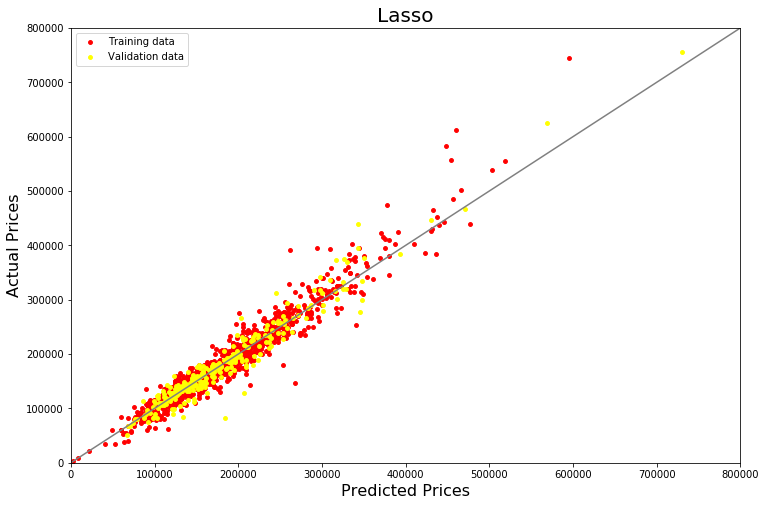

In [14]:
y_train_lasso = grid_lasso.predict(X_train)
y_test_lasso = grid_lasso.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_lasso), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_lasso), np.expm1(y_test), c='yellow', marker='o', s=15, label = "Validation data")
plt.title("Lasso", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [15]:
# ElasticNet

In [16]:
eNet = linear_model.ElasticNet(normalize = True)

eNet.set_params(random_state=12)

# Train the model on training data
eNet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=12, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
# Initial prediction
eNet_pred = eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(eNet_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

Mean Absolute Error (MAE): $ Unnamed: 0             inf
SalePrice     5.487959e+04
dtype: float64
Mean Squared Error (MSE): 84915.42866997528
Root Mean Square Error (RMSE): 291.40252001308306
Mean Absolute Percent Error (MAPE): Unnamed: 0          inf
SalePrice     30.620000
dtype: float64 %.


In [18]:
# Tune hyperparameters (eNet)

In [19]:
param_grid_eNet = {"max_iter": [5, 10, 20],
                    "alpha": 100**np.linspace(10,-2,1000)*0.5,
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [ ]:
grid_search_eNet = ms.GridSearchCV(eNet, param_grid_eNet, scoring= 'neg_mean_squared_error', 
                                    n_jobs=-1, return_train_score = True)

%time grid_search_eNet.fit(X_train, y_train)

In [21]:
# get the best parameters
grid_search_eNet.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Prediction using the tuned parameters
grid_eNet = grid_search_eNet.best_estimator_

In [ ]:
print("The train set R^2 is: %.5f" % grid_eNet.score(X_train, y_train))
print("The test set R^2 is is: %.5f" % grid_eNet.score(X_test, y_test))

In [ ]:
#Prediction with tuned hyperparameters
grid_eNet_pred = grid_eNet.predict(X_test)

# Calculate the absolute errors
errors = abs(np.expm1(grid_eNet_pred) - np.expm1(y_test))

# Print out MAE, MSE, and RMSE
print('Mean Absolute Error (MAE): $', round(np.mean(errors), 2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, grid_eNet_pred))
print('Root Mean Square Error (RMSE):', np.sqrt(mean_squared_error(y_test, grid_eNet_pred)))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.expm1(y_test))
print('Mean Absolute Percent Error (MAPE):', round(np.mean(mape), 2), '%.')

In [ ]:
y_train_eNet = grid_eNet.predict(X_train)
y_test_eNet = grid_eNet.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(np.expm1(y_train_eNet), np.expm1(y_train), c='red', marker="o", s=15, label = "Training data")
plt.scatter(np.expm1(y_test_eNet), np.expm1(y_test), c='blue', marker='o', s=15, label = "Validation data")
plt.title("ElasticNet", fontsize = 20)
plt.xlabel("Predicted Prices", fontsize = 16)
plt.ylabel("Actual Prices", fontsize = 16)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.legend(loc = "upper left")
plt.plot([0, 800000], [0, 800000], c = "grey")
plt.show()

In [111]:
train=X_train.join(y_train)
test=X_test.join(y_test)
complt=train.append(test)
complt.sort_values(by='')
complt.to_csv('basementY.csv')

In [59]:
X_test.shape

(292, 287)

In [112]:
complt

,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,GarageCars_0.0,GarageCars_1.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,KitchenAbvGr_0,KitchenAbvGr_2,KitchenAbvGr_3,FullBath_0,FullBath_1,FullBath_3,FullBath_4,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_None,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Ex,KitchenQual_Gd,TotRmsAbvGrd_10,...,HalfBath_2,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Foundation_BrkTil,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,LotFrontage,PoolArea,TotalBsmtSF,OverallCond,YearBuilt,MiscVal,LowQualFinSF,OverallQual,ScreenPorch,BsmtUnfSF,3SsnPorch,1stFlrSF,BsmtFinSF1,LotArea,MoSold,2ndFlrSF,EnclosedPorch,YearRemodAdd,MasVnrArea,MSSubClass,YrSold,GrLivArea,GarageYrBlt,OpenPorchSF,WoodDeckSF,GarageArea,BsmtFinSF2,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,16.950603,0.000000,315.437584,5,2003,0.000000,0.000000,7,0.000000,29.911846,0.000000,5.382920,117.535364,16.988455,2,950.250550,0.000000,2003,19.379827,6.580003,2008,7.071400,2003.0,11.995729,0.000000,548.0,0.000000,12.247694
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,16.950603,0.000000,315.437584,5,2003,0.000000,0.000000,7,0.000000,29.911846,0.000000,5.382920,117.535364,16.988455,2,950.250550,0.000000,2003,19.379827,6.580003,2008,7.071400,2003.0,11.995729,0.000000,548.0,0.000000,NaN
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.234187,0.000000,323.331533,6,1961,0.000000,0.000000,5,20.151030,42.684190,0.000000,5.411324,89.041399,18.017660,6,0.000000,0.000000,1961,0.000000,4.287287,2010,6.486677,1961.0,0.000000,33.601846,730.0,7.671705,12.247694
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.234187,0.000000,323.331533,6,1961,0.000000,0.000000,5,20.151030,42.684190,0.000000,5.411324,89.041399,18.017660,6,0.000000,0.000000,1961,0.000000,4.287287,2010,6.486677,1961.0,0.000000,33.601846,730.0,7.671705,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.379527,0.000000,453.604252,6,1958,10.144061,0.000000,6,0.000000,54.494992,0.000000,5.652838,140.790610,18.702224,6,0.000000,0.000000,1958,14.608112,4.287287,2010,6.843943,1958.0,9.051078,65.273121,312.0,0.000000,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.379527,0.000000,453.604252,6,1958,10.144061,0.000000,6,0.000000,54.494992,0.000000,5.652838,140.790610,18.702224,6,0.000000,0.000000,1958,14.608112,4.287287,2010,6.843943,1958.0,9.051078,65.273121,312.0,0.000000,12.109011
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.234187,0.000000,434.641972,8,1976,0.000000,0.000000,6,0.000000,44.000411,0.000000,5.621522,146.382370,17.395458,5,0.000000,0.000000,1976,0.000000,4.287287,2007,6.797170,1976.0,0.000000,54.689201,460.0,0.000000,NaN
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,19.234187,0.000000,434.641972,8,1976,0.000000,0.000000,6,0.000000,44.000411,0.000000,5.621522,146.382370,17.395458,5,0.000000,0.000000,1976,0.000000,4.287287,2007,6.797170,1976.0,0.000000,54.689201,460.0,0.000000,12.109011
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,18.345074,0.000000,337.198579,5,1997,0.000000,0.000000,5,0.000000,28.302696,0.000000,5.433088,126.894344,18.597211,3,777.183924,0.000000,1998,0.000000,6.580003,2010,7.027670